<a href="https://colab.research.google.com/github/andreidore/recipes/blob/main/recipies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 895 kB 51.4 MB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from transformers import AutoTokenizer, TFBertModel, BertConfig

In [10]:
df=pd.read_csv("recipes.csv",sep=";")

In [11]:
df.head()

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
0,Golden Crescent Rolls Recipe,304,https://images.media-allrecipes.com/userphotos...,Mike A.,25 m,15 m,3 h 10 m,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",7000
1,Poppy Seed Bread with Glaze Recipe,137,https://images.media-allrecipes.com/userphotos...,Christina Jun,15 m,1 h,1 h 20 m,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,7001
2,Applesauce Bread I Recipe,124,https://images.media-allrecipes.com/userphotos...,GAF55,10 m,1 h 20 m,1 h 30 m,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....,7003
3,Apple Raisin Bread Recipe,39,https://images.media-allrecipes.com/userphotos...,Helen Hanson,15 m,1 h,1 h 15 m,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....,7006
4,Buttermilk Oatmeal Bread Recipe,41,https://images.media-allrecipes.com/userphotos...,Helen Hanson,10 m,1 h,1 h 40 m,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...,7007


In [13]:
df=df[["Ingredients","Directions"]]
df.head()

,Ingredients,Directions
0,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ..."
1,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...
2,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....
3,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....
4,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...


In [14]:
df.shape

(12351, 2)

In [39]:
df.dropna(inplace=True)
df.drop_duplicates(subset=["Directions"], inplace=True)


In [40]:
df.shape

(12184, 2)

In [51]:
ingredients= set([item for ing in df["Ingredients"].values for item in ing.split(",")])
len(ingredients)
ingredients

{'',
 ' 2',
 ' 2 inches thick',
 ' and 3:',
 ' and dried',
 ' casings removed',
 ' chopped',
 ' cleaned',
 ' cubed',
 ' cut into 1/2 inch thick circles',
 ' divided',
 ' drained',
 ' drained and chopped',
 ' drained and finely chopped',
 ' drained and mashed',
 ' for topping',
 ' ground',
 ' halved',
 ' julienned',
 ' lean',
 ' mashed',
 ' peeled and cubed',
 ' peeled and julienned',
 ' peeled and segmented',
 ' peeled and shredded',
 ' rinsed',
 ' rinsed and dried',
 ' rinsed and torn',
 ' seasoned croutons',
 ' soaked',
 ' split',
 ' split and toasted',
 ' stemmed and rinsed',
 ' thawed',
 ' to taste',
 ' warmed',
 ' washed and cubed',
 ' without shells',
 "'1 pound calves'' brains",
 "'2 cups crushed zwieback toast",
 "'3 tablespoons meringue powder",
 "'5 pig''s feet",
 "'CRUST:",
 "'Crust:",
 "'LADYFINGERS",
 "'Streusel:",
 '1 (.25 ounce) package Spanish seasoning',
 '1 (.25 ounce) package unflavored Jell-O®',
 '1 (.7 ounce) package Italian-style dressing mix',
 '1 (1 ounce) packa

In [53]:
def get_label(direction_sentence,ingredients):

  labels=[]
  for w in direction_sentence.split():
    print(w)
    if w in ingredients:
      labels.append("I")

    else:
      labels.append("O")

    
  return labels  


label=get_label("Dissolve yeast in warm water and wheat germ",ingredients)
print(label)


Dissolve
yeast
in
warm
water
and
wheat
germ
['O', 'I', 'O', 'O', 'I', 'O', 'I', 'O']


0      669
1      529
2      328
3      360
4      321
5      564
6      723
7      169
8      386
9      329
10     440
11     250
12     805
13     658
14     466
15     852
16     362
17    1061
18     108
19     136
Name: Directions, dtype: int64


(array([3.528e+03, 6.000e+03, 2.102e+03, 5.060e+02, 1.360e+02, 4.500e+01,
        2.000e+01, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([  33. ,  328.1,  623.2,  918.3, 1213.4, 1508.5, 1803.6, 2098.7,
        2393.8, 2688.9, 2984. ]),
 <a list of 10 Patch objects>)

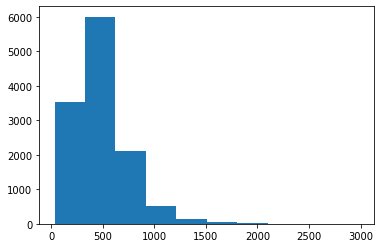

In [31]:
directions_len=df["Directions"].apply(len)
print(directions_len[:20])
plt.hist(directions_len)

In [35]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
inf

In [ ]:
dataset_dict = {
        "input_ids": [],
        "token_type_ids": [],
        "attention_mask": [],
        "tags": []
    }

    